# RBM Recommender system, training and example

In [2]:
from src.eval import evaluate_rbm, evaluate_dbn
from src.data_preprocessing import load_data, preprocess_data, load_movies
from src.models import GaussianBernoulliRBM, DBN
from src.plot_utils import plot_training_loss
from sklearn.model_selection import train_test_split
import torch
from src.utils import test_recommendation_ability, movie_from_tensor, recommend
import random

## TRAINING
First we intialize our dataset and parameters. In our dataset, movies user hasn't watched are marked as 0 and rates are scaled from 1-5 to (0, 1].

In [3]:
file_path = "data\\ml-100k\\u.data"
data = load_data(file_path)
interaction_matrix = preprocess_data(data)


interaction_tensor = torch.tensor(interaction_matrix.values, dtype=torch.float32)
train_data, test_data = train_test_split(interaction_tensor.numpy(), test_size=0.3, random_state=42)

train_data = torch.tensor(train_data, dtype=torch.float32)
test_data = torch.tensor(test_data, dtype=torch.float32)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Next we train Gaussian Benroulli RBM on the given dataset.


Training Gaussian-Bernoulli RBM


Epoch 1/30: 100%|██████████| 42/42 [00:01<00:00, 36.98it/s, Loss=0.0414]


Reconstruction Loss: 0.0366


Epoch 2/30: 100%|██████████| 42/42 [00:01<00:00, 39.82it/s, Loss=0.0594]


Reconstruction Loss: 0.0339


Epoch 3/30: 100%|██████████| 42/42 [00:01<00:00, 39.08it/s, Loss=0.0334]


Reconstruction Loss: 0.0323


Epoch 4/30: 100%|██████████| 42/42 [00:01<00:00, 38.62it/s, Loss=0.0435]


Reconstruction Loss: 0.0313


Epoch 5/30: 100%|██████████| 42/42 [00:01<00:00, 39.02it/s, Loss=0.0368]


Reconstruction Loss: 0.0306


Epoch 6/30: 100%|██████████| 42/42 [00:01<00:00, 40.98it/s, Loss=0.0476]


Reconstruction Loss: 0.0303


Epoch 7/30: 100%|██████████| 42/42 [00:01<00:00, 36.82it/s, Loss=0.0286]


Reconstruction Loss: 0.0295


Epoch 8/30: 100%|██████████| 42/42 [00:01<00:00, 39.06it/s, Loss=0.0315]


Reconstruction Loss: 0.0291


Epoch 9/30: 100%|██████████| 42/42 [00:01<00:00, 40.37it/s, Loss=0.0248]


Reconstruction Loss: 0.0286


Epoch 10/30: 100%|██████████| 42/42 [00:01<00:00, 39.19it/s, Loss=0.0202]


Reconstruction Loss: 0.0283


Epoch 11/30: 100%|██████████| 42/42 [00:01<00:00, 41.62it/s, Loss=0.017] 


Reconstruction Loss: 0.0279


Epoch 12/30: 100%|██████████| 42/42 [00:01<00:00, 36.78it/s, Loss=0.0302]


Reconstruction Loss: 0.0278


Epoch 13/30: 100%|██████████| 42/42 [00:01<00:00, 37.74it/s, Loss=0.0395]


Reconstruction Loss: 0.0277


Epoch 14/30: 100%|██████████| 42/42 [00:01<00:00, 37.95it/s, Loss=0.0305]


Reconstruction Loss: 0.0274


Epoch 15/30: 100%|██████████| 42/42 [00:01<00:00, 40.39it/s, Loss=0.0369]


Reconstruction Loss: 0.0272


Epoch 16/30: 100%|██████████| 42/42 [00:01<00:00, 39.80it/s, Loss=0.0324]


Reconstruction Loss: 0.0268


Epoch 17/30: 100%|██████████| 42/42 [00:01<00:00, 41.30it/s, Loss=0.024] 


Reconstruction Loss: 0.0264


Epoch 18/30: 100%|██████████| 42/42 [00:01<00:00, 38.93it/s, Loss=0.0272]


Reconstruction Loss: 0.0262


Epoch 19/30: 100%|██████████| 42/42 [00:01<00:00, 38.94it/s, Loss=0.0244]


Reconstruction Loss: 0.0260


Epoch 20/30: 100%|██████████| 42/42 [00:01<00:00, 37.36it/s, Loss=0.0295]


Reconstruction Loss: 0.0258


Epoch 21/30: 100%|██████████| 42/42 [00:01<00:00, 38.56it/s, Loss=0.0303]


Reconstruction Loss: 0.0257


Epoch 22/30: 100%|██████████| 42/42 [00:01<00:00, 39.96it/s, Loss=0.0316]


Reconstruction Loss: 0.0255


Epoch 23/30: 100%|██████████| 42/42 [00:01<00:00, 40.19it/s, Loss=0.0239]


Reconstruction Loss: 0.0253


Epoch 24/30: 100%|██████████| 42/42 [00:01<00:00, 39.13it/s, Loss=0.0294]


Reconstruction Loss: 0.0251


Epoch 25/30: 100%|██████████| 42/42 [00:01<00:00, 38.01it/s, Loss=0.0306]


Reconstruction Loss: 0.0249


Epoch 26/30: 100%|██████████| 42/42 [00:01<00:00, 37.77it/s, Loss=0.0256]


Reconstruction Loss: 0.0247


Epoch 27/30: 100%|██████████| 42/42 [00:01<00:00, 40.50it/s, Loss=0.042] 


Reconstruction Loss: 0.0249


Epoch 28/30: 100%|██████████| 42/42 [00:01<00:00, 37.53it/s, Loss=0.0232]


Reconstruction Loss: 0.0245


Epoch 29/30: 100%|██████████| 42/42 [00:01<00:00, 38.91it/s, Loss=0.0307]


Reconstruction Loss: 0.0243


Epoch 30/30: 100%|██████████| 42/42 [00:00<00:00, 42.99it/s, Loss=0.0189]


Reconstruction Loss: 0.0240


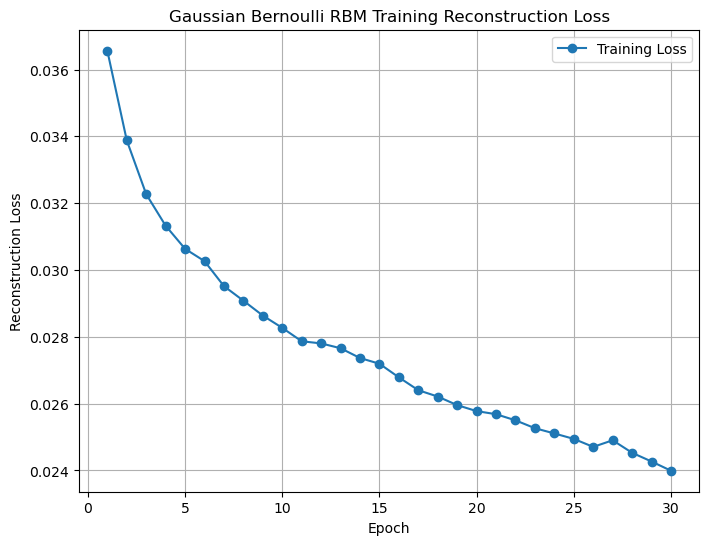

Validation loss: 0.04198333732586341
Validation accuracy: 66.58487498056748%


In [7]:
num_visible = interaction_tensor.shape[1]
num_hidden = 300
rbm = GaussianBernoulliRBM(num_visible=num_visible, num_hidden=num_hidden, device=device, sigma=0.1)

losses = rbm.train_rbm(train_data, batch_size=16, epochs=30, learning_rate=0.01, device=device)

plot_training_loss(losses, title="Gaussian Bernoulli RBM Training Reconstruction Loss", xlabel="Epoch", ylabel="Reconstruction Loss")
loss, acc = evaluate_rbm(rbm, test_data, device)
print(f"Validation loss: {loss}")
print(f"Validation accuracy: {acc*100}%")

with open('models/rbm.th', 'wb') as f:
    torch.save({
        'rbm_w': rbm.W,
        'rbm_v': rbm.v_bias,
        'rbm_h': rbm.h_bias,
        'num_hidden': num_hidden,
        'num_visible': num_visible,
        'sigma': rbm.sigma
    }, f)

Furthermore, we train DBN on the same dataset. DBN consists of one Gaussian Bernoulli RBM, and rest of the RBM models are usual Binary RBMs.  
The goal is to compare standalone RBM to DBN.


Training Deep Belief Network

First RBM already trained

Training 1. Binary-Binary RBM layer


Epoch 1/30: 100%|██████████| 42/42 [00:00<00:00, 189.38it/s, Loss=0.178]


Reconstruction Loss: 0.1951


Epoch 2/30: 100%|██████████| 42/42 [00:00<00:00, 198.58it/s, Loss=0.168]


Reconstruction Loss: 0.1802


Epoch 3/30: 100%|██████████| 42/42 [00:00<00:00, 216.36it/s, Loss=0.167]


Reconstruction Loss: 0.1744


Epoch 4/30: 100%|██████████| 42/42 [00:00<00:00, 200.89it/s, Loss=0.176]


Reconstruction Loss: 0.1712


Epoch 5/30: 100%|██████████| 42/42 [00:00<00:00, 177.69it/s, Loss=0.154]


Reconstruction Loss: 0.1687


Epoch 6/30: 100%|██████████| 42/42 [00:00<00:00, 186.44it/s, Loss=0.155]


Reconstruction Loss: 0.1672


Epoch 7/30: 100%|██████████| 42/42 [00:00<00:00, 194.95it/s, Loss=0.164]


Reconstruction Loss: 0.1652


Epoch 8/30: 100%|██████████| 42/42 [00:00<00:00, 189.01it/s, Loss=0.163]


Reconstruction Loss: 0.1639


Epoch 9/30: 100%|██████████| 42/42 [00:00<00:00, 214.23it/s, Loss=0.162]


Reconstruction Loss: 0.1622


Epoch 10/30: 100%|██████████| 42/42 [00:00<00:00, 217.24it/s, Loss=0.181]


Reconstruction Loss: 0.1614


Epoch 11/30: 100%|██████████| 42/42 [00:00<00:00, 190.20it/s, Loss=0.129]


Reconstruction Loss: 0.1590


Epoch 12/30: 100%|██████████| 42/42 [00:00<00:00, 193.81it/s, Loss=0.115]


Reconstruction Loss: 0.1579


Epoch 13/30: 100%|██████████| 42/42 [00:00<00:00, 193.66it/s, Loss=0.171]


Reconstruction Loss: 0.1574


Epoch 14/30: 100%|██████████| 42/42 [00:00<00:00, 205.11it/s, Loss=0.158]


Reconstruction Loss: 0.1561


Epoch 15/30: 100%|██████████| 42/42 [00:00<00:00, 184.75it/s, Loss=0.144]


Reconstruction Loss: 0.1547


Epoch 16/30: 100%|██████████| 42/42 [00:00<00:00, 187.94it/s, Loss=0.148]


Reconstruction Loss: 0.1538


Epoch 17/30: 100%|██████████| 42/42 [00:00<00:00, 187.45it/s, Loss=0.2]  


Reconstruction Loss: 0.1541


Epoch 18/30: 100%|██████████| 42/42 [00:00<00:00, 204.10it/s, Loss=0.169]


Reconstruction Loss: 0.1524


Epoch 19/30: 100%|██████████| 42/42 [00:00<00:00, 205.63it/s, Loss=0.153]


Reconstruction Loss: 0.1512


Epoch 20/30: 100%|██████████| 42/42 [00:00<00:00, 207.29it/s, Loss=0.143]


Reconstruction Loss: 0.1511


Epoch 21/30: 100%|██████████| 42/42 [00:00<00:00, 189.20it/s, Loss=0.165]


Reconstruction Loss: 0.1504


Epoch 22/30: 100%|██████████| 42/42 [00:00<00:00, 202.54it/s, Loss=0.156]


Reconstruction Loss: 0.1493


Epoch 23/30: 100%|██████████| 42/42 [00:00<00:00, 197.64it/s, Loss=0.14] 


Reconstruction Loss: 0.1490


Epoch 24/30: 100%|██████████| 42/42 [00:00<00:00, 185.97it/s, Loss=0.147]


Reconstruction Loss: 0.1485


Epoch 25/30: 100%|██████████| 42/42 [00:00<00:00, 186.61it/s, Loss=0.0967]


Reconstruction Loss: 0.1469


Epoch 26/30: 100%|██████████| 42/42 [00:00<00:00, 212.31it/s, Loss=0.14] 


Reconstruction Loss: 0.1467


Epoch 27/30: 100%|██████████| 42/42 [00:00<00:00, 225.30it/s, Loss=0.137]


Reconstruction Loss: 0.1461


Epoch 28/30: 100%|██████████| 42/42 [00:00<00:00, 220.15it/s, Loss=0.142]


Reconstruction Loss: 0.1459


Epoch 29/30: 100%|██████████| 42/42 [00:00<00:00, 190.35it/s, Loss=0.136]


Reconstruction Loss: 0.1447


Epoch 30/30: 100%|██████████| 42/42 [00:00<00:00, 193.72it/s, Loss=0.146]


Reconstruction Loss: 0.1446


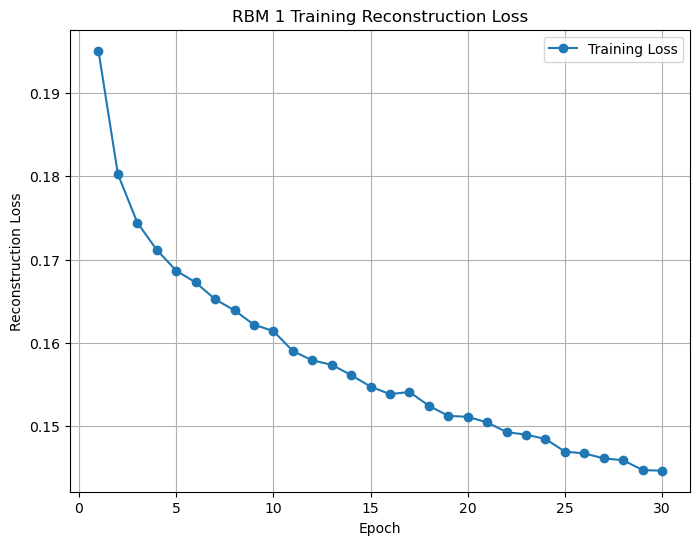

Validation loss: 0.0388
Validation accuracy: 66.05%


In [13]:
num_hidden2 = 200
rbm_layers = [num_visible, num_hidden, num_hidden2]
dbn = DBN(rbm_layers, rbm_path='models/rbm.th', device=device)

dbn.pretrain(train_data, epochs=[30,30], learning_rate=[0.01, 0.01], batch_size=16, device=device)

loss, acc = evaluate_dbn(dbn, test_data, device)
print(f"Validation loss: {loss:.4f}")
print(f"Validation accuracy: {acc*100:.2f}%")

DBN.save_dbn(dbn, 'models/dbn.th')

## RECOMMENDATION ACCURACY
Validation accuracies from above are actually reconstruction accuracies.
Now we will take users from test data, hide some of their ratings and check if our models rates those movies in the same manner.

In [14]:
hide_fraction = 0.2  # Hide 20% of rated movies
accuracy_rbm, accuracy_dbn = test_recommendation_ability(rbm, dbn, test_data, device, hide_fraction=hide_fraction, k=1)
print(f"GB RBM Recommendation accuracy: {accuracy_rbm*100:.2f}%")
print(f"DBN Recommendation accuracy: {accuracy_dbn*100:.2f}%")

GB RBM Recommendation accuracy: 93.51%
DBN Recommendation accuracy: 94.85%


## USAGE EXAMPLE
First, we load the movies dataframe.

In [15]:
movies = load_movies("data\\ml-100k\\u.item")

Now, we pick a random user and print movies they liked (rate >=3 means they liked the movie).

In [16]:
random.seed(100)
random_user = random.randint(1, len(test_data))
rates = test_data[random_user]
movie_from_tensor(rates, movies)

watched = torch.zeros_like(rates)
watched[rates != 0] = 1

'Toy Story (1995)' has the following genres:
Animation, Children's, Comedy
--------------------------------------------------
'Braveheart (1995)' has the following genres:
Drama, War
--------------------------------------------------
'Star Wars (1977)' has the following genres:
Adventure, Romance, Sci-Fi, War
--------------------------------------------------
'Shawshank Redemption, The (1994)' has the following genres:

--------------------------------------------------
'Fargo (1996)' has the following genres:
Drama, Thriller
--------------------------------------------------
'Wallace & Gromit: The Best of Aardman Animation (1996)' has the following genres:

--------------------------------------------------
'Rock, The (1996)' has the following genres:
Adventure, Thriller
--------------------------------------------------
'Wizard of Oz, The (1939)' has the following genres:
Children's, Drama, Musical
--------------------------------------------------
'Die Hard (1988)' has the following

Now, the idea is to reconstruct the users watched list, and keep the probabilities from reconstruction. We pick the largest n=5 probabilities of movies the user has not watched as recommendation.

First we use RBM.

In [17]:
v = rbm.reconstruct(rates)
to_recommend = recommend(watched, v, 5)
movie_from_tensor(to_recommend, movies)

'Usual Suspects, The (1995)' has the following genres:
Thriller
--------------------------------------------------
'Terminator 2: Judgment Day (1991)' has the following genres:
Sci-Fi, Thriller
--------------------------------------------------
'Godfather, The (1972)' has the following genres:
Crime, Drama
--------------------------------------------------
'Fish Called Wanda, A (1988)' has the following genres:

--------------------------------------------------
'Terminator, The (1984)' has the following genres:
Sci-Fi, Thriller
--------------------------------------------------


Then we use DBN.

In [18]:
v = dbn.reconstruct(rates)
to_recommend = recommend(watched, v, 5)
movie_from_tensor(to_recommend, movies)

'Usual Suspects, The (1995)' has the following genres:
Thriller
--------------------------------------------------
'Apollo 13 (1995)' has the following genres:
Drama, Thriller
--------------------------------------------------
'Pulp Fiction (1994)' has the following genres:
Drama
--------------------------------------------------
'Blade Runner (1982)' has the following genres:
Sci-Fi
--------------------------------------------------
'Silence of the Lambs, The (1991)' has the following genres:
Thriller
--------------------------------------------------
